In [1]:
#importing the necessary libraries for analysis and visualisation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
economic_growth_data = pd.read_csv('GrowthDJ.csv') #reading the dataset into a Dataframe

In [3]:
economic_growth_data.head() #displaying first five rows

,Unnamed: 0,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0


In [4]:
economic_growth_data.shape #display the number of rows and columns

(121, 11)

In [5]:
economic_growth_data.info()  #displays summary of the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  121 non-null    int64  
 1   oil         121 non-null    object 
 2   inter       121 non-null    object 
 3   oecd        121 non-null    object 
 4   gdp60       116 non-null    float64
 5   gdp85       108 non-null    float64
 6   gdpgrowth   117 non-null    float64
 7   popgrowth   107 non-null    float64
 8   invest      121 non-null    float64
 9   school      118 non-null    float64
 10  literacy60  103 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.5+ KB


In [6]:
economic_growth_data.drop(columns=['Unnamed: 0'], inplace=True) #drop unwanted column

In [7]:
economic_growth_data.head()

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0


In [8]:
economic_growth_data.rename(columns={'inter': 'dataquality'},
                            inplace=True,
                            errors='raise')  #rename column for better clarity

In [9]:
economic_growth_data.head()

,oil,dataquality,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0


In [10]:
economic_growth_data.isna().sum() #checking for null data

oil             0
dataquality     0
oecd            0
gdp60           5
gdp85          13
gdpgrowth       4
popgrowth      14
invest          0
school          3
literacy60     18
dtype: int64

In [11]:
economic_growth_data.isna().any(axis=1).sum() #checking how many rows contain null values

21

In [12]:
#Filling null values with the mean of the dataset

values = {
    "gdp60": economic_growth_data.gdp60.mean(),
    "gdp85": economic_growth_data.gdp85.mean(),
    "popgrowth": economic_growth_data.popgrowth.mean(),
    "gdpgrowth": economic_growth_data.gdpgrowth.mean(),
    "popgrowth": economic_growth_data.popgrowth.mean(),
    "school": economic_growth_data.school.mean(),
    "literacy60": economic_growth_data.literacy60.mean()
    
}

economic_growth_data2 = economic_growth_data.fillna(value=values)

In [13]:
economic_growth_data2.isna().sum()

oil            0
dataquality    0
oecd           0
gdp60          0
gdp85          0
gdpgrowth      0
popgrowth      0
invest         0
school         0
literacy60     0
dtype: int64

### Correlation and Regression Analysis

In [14]:
pearsoncorr = economic_growth_data.corr(method='pearson')
pearsoncorr

,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
gdp60,1.000000,0.630505,-0.122174,0.291304,0.091031,0.337358,0.257476
gdp85,0.630505,1.000000,0.139063,-0.222036,0.580661,0.697297,0.729110
gdpgrowth,-0.122174,0.139063,1.000000,0.242443,0.350510,0.197995,0.160969
popgrowth,0.291304,-0.222036,0.242443,1.000000,-0.331930,-0.212766,-0.414744
invest,0.091031,0.580661,0.350510,-0.331930,1.000000,0.622444,0.639264
school,0.337358,0.697297,0.197995,-0.212766,0.622444,1.000000,0.818405
literacy60,0.257476,0.729110,0.160969,-0.414744,0.639264,0.818405,1.000000


<AxesSubplot:>

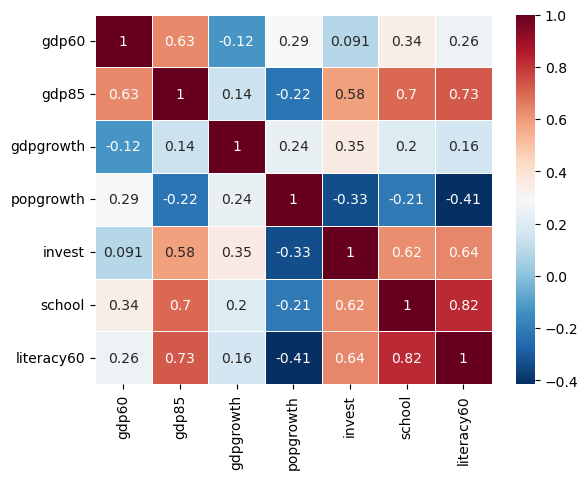

In [15]:
#heatmap for better pictorial representation

sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

A co-efficient close to 1 indicates there is a very strong positive correlation between the two variables. In the above table for instance, the maroon indicates very strong correlations. The diagonal line signifies the correlation of the variables to themselves — which would obviously be 1.

Looking at the above map, we can infer that:

Between 1960 and 1985, growth rate of working-age population(popgrowth), average ratio of investment to GDP(invest), fraction of the population able to read and write in 1960(literacy60); are positively correlated to GDP growth, though not strongly.

The average fraction of working-age population enrolled in secondary school from 1960 to 1985(school), is however strongly correlated to the fraction of population able to read and write in 1960(literacy1960) at 0.82, which is expected. A high population of enrolled individuals in schools is expected to lead to a high literacy rate and vice versa, ceteris paribus. The literacy rate is then strongly correlated to the per capita GDP in 1985 at 0.73

In [16]:
economic_growth_data2['intercept'] = 1 # This will set the intercept column to have a constant value of 1 for all rows.

# Define the independent variables (including the intercept column) and the dependent variable

Y = economic_growth_data2['gdpgrowth']
X = economic_growth_data2[['intercept', 'popgrowth', 'invest', 'school', 'literacy60']]

In [17]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              gdpgrowth   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     9.449
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.20e-06
Time:                        00:34:47   Log-Likelihood:                -229.20
No. Observations:                 121   AIC:                             468.4
Df Residuals:                     116   BIC:                             482.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3324      0.653      0.509      0.6

#Using the Ordinary Least Squares method of regression analysis, the R-squared which measures how much of the independent variable is explained by changes in our dependent variables, is 0.246. This would mean our model explains 24.6% of the change in our economic growth (gdpgrowth) variable

Another statistical measure we would be considering is the p-value. If the p-value is below 0.05, we would reject the null hypothesis and conclude that the independent variable has a statistically significant effect on the dependent variable.

In [18]:
alpha = 0.05

p1 = 0.457  #p-value for school
p2 = 0.446  #p-value for literacy60

p1

if p1 < alpha:
    print(
        'The average fraction of working age population in secondary school has a statistically significant effect on the dependent variable'
    )
else:
    print(
        'The average fraction of working age population in secondary school has no statistically significant effect on the dependent variable'
    )
if p2 < alpha:
    print(
        'Fraction of the population over 15 years old that is able to read and write, has a statistically significant effect on the dependent variable'
    )
else:
    print(
        'Fraction of the population over 15 years old that is able to read and write has no statistically significant effect on the dependent variable'
    )

The average fraction of working age population in secondary school has no statistically significant effect on the dependent variable
Fraction of the population over 15 years old that is able to read and write has no statistically significant effect on the dependent variable


P>|t| uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.457 and 0.446 for school and literacy rate respectively is saying there is a 45.7% and 44.6% chance that both variables have no affect on the dependent variable, gdpgrowth, and our results are produced by chance.

### Visualizations

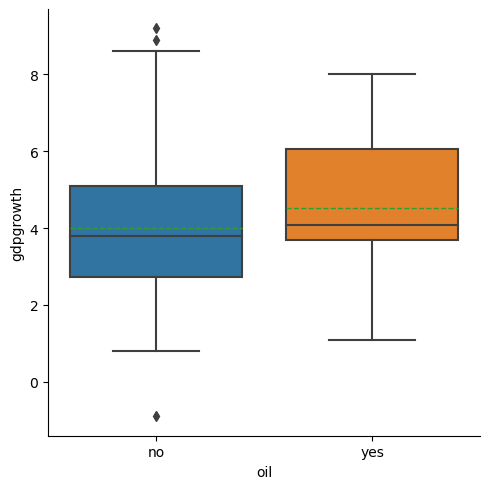

In [19]:
sns.catplot(data=economic_growth_data2,
            x="oil",
            y="gdpgrowth",
            kind="box",
            meanline=True,
            showmeans=True)

The boxplot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

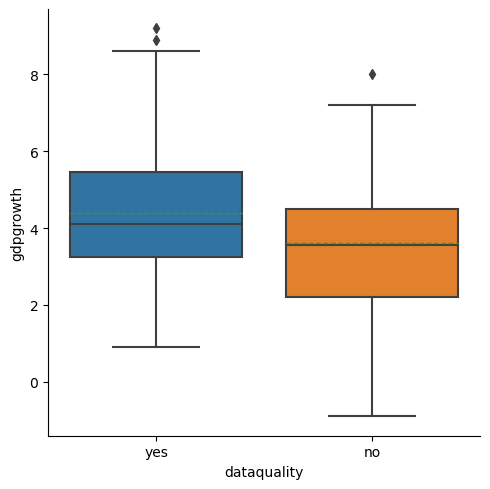

In [20]:
sns.catplot(data=economic_growth_data2,
            x="dataquality",
            y="gdpgrowth",
            kind="box",
            meanline=True,
            showmeans=True)

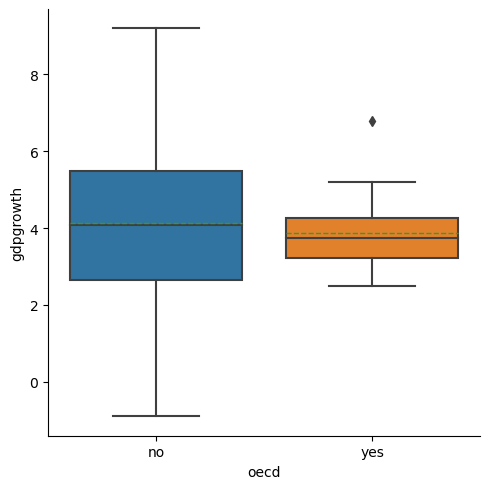

In [21]:
sns.catplot(data=economic_growth_data2,
            x="oecd",
            y="gdpgrowth",
            kind="box",
            meanline=True,
            showmeans=True)

#References

Waskom, M. (2021). Seaborn: statistical data visualization (Version 0.11.2) [Software]. Available from https://seaborn.pydata.org/

McAleer, T. (2020, Dec 5).Interpreting Linear Regression Through statsmodels. Medium. https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

Magiya, J. (2019, April 14). Pearson Coefficient of Correlation with Python. Medium. https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. Proceedings of the 9th Python in Science Conference, 57, 61-66.

Hunter, J.D. (2007). Matplotlib: A 2D Graphics Environment in Computing in Science & Engineering, 9(3), pp. 90-95